Oleh : Fitri Dwi Hastuti

Ini merupakan Project Based Intern yang diselenggarakan oleh Rakamin Academy X Kalbe Nutritionals. Final projek yang diberikan untuk memprediksi jumlah quantity harian menggunakan model regresi time series ARIMA dan klastering pelanggan menggunakan model KMeans.

Dataset dalam projek ini terdiri dari 4 tabel yaitu customer, produk, store, dan transaksi.

Model ARIMA (Autoregressive Integrated Moving Average) adalah model statistik yang digunakan untuk menganalisis dan meramalkan data deret waktu. Model ini terdiri dari tiga komponen utama: Autoregressive (AR), Integrated (I), dan Moving Average (MA).
- Komponen Autoregressive (AR): Memperhatikan hubungan antara nilai sekarang dengan nilai sebelumnya.
- Komponen Integrated (I): Menggunakan differencing untuk membuat data stasioner (tanpa tren atau pola).
- Komponen Moving Average (MA): Memperhatikan pengaruh gangguan sebelumnya pada nilai sekarang.

Untuk memeriksa stasioneritas data pada kasus ini digunakan pengujian Augmented Dickey-Fuller (ADF).

Model K-Means adalah salah satu teknik klastering yang digunakan dalam analisis data. Tujuan utama dari model K-Means adalah mengelompokkan data menjadi beberapa kelompok atau klaster berdasarkan kemiripan antara data. Model ini didasarkan pada algoritma klastering yang mencoba meminimalkan jarak antara data dalam satu klaster dan memaksimalkan jarak antara klaster. Pada kasus ini digunakan Elbow method untuk menentukan banyaknya klaster.

### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

from sklearn.cluster import KMeans

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [2]:
customer = pd.read_csv('Case Study - Customer.csv')
produk = pd.read_csv('Case Study - Product.csv')
store = pd.read_csv('Case Study - Store.csv')
transaksi = pd.read_csv('Case Study - Transaction.csv')
print('Sampel Tabel Customer')
print(customer.sample())
print('=============================================================================')
print('')
print('Sampel Tabel Produk')
print(produk.sample())
print('=============================================================================')
print('')
print('Sampel Tabel Store')
print(store.sample())
print('=============================================================================')
print('')
print('Sampel Tabel Transaksi')
print(transaksi.sample())

Sampel Tabel Customer
     CustomerID  Age  Gender Marital Status  Income
243         244   21       1         Single    3.64

Sampel Tabel Produk
  ProductID Product Name  Price
7        P8          Oat  16000

Sampel Tabel Store
   StoreID         StoreName GroupStore          Type  Latitude   Longitude
1        2  Prima Kelapa Dua      Prima  Modern Trade -6.914864  107.608238

Sampel Tabel Transaksi
    TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
712       TR15420         404  22/02/2022        P9  10000    4        40000   

     StoreID  
712       11  


### Preprocessing Data

In [3]:
print('Info Tabel Customer')
customer.info()
print('')
print('==============================================')
print('')
print('Info Tabel Produk')
produk.info()
print('')
print('==============================================')
print('')
print('Info Tabel Store')
store.info()
print('')
print('==============================================')
print('')
print('Info Tabel Transaksi')
transaksi.info()

Info Tabel Customer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


Info Tabel Produk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


Info Tabel Store
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 c

In [4]:
# Menggabungkan 4 tabel menjadi 1 dataframe
df = pd.merge(transaksi, customer, on = 'CustomerID', how = 'inner')
df = pd.merge(df, produk, on = 'ProductID', how = 'inner')
df = pd.merge(df, store, on = 'StoreID', how = 'inner')

# mengubah kolom Date menjadi tipe date
df['Date']=pd.to_datetime(df['Date'])

# mengurutkan dataset berdasarkan Date
df.sort_values(by=['Date'], inplace=True)

df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1311,TR99839,123,2022-01-01,P2,3200,6,19200,1,34,0,Married,4.36,Ginger Candy,3200,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
434,TR67455,49,2022-01-01,P5,4200,3,12600,13,44,1,Married,13.48,Thai Tea,4200,Buana,Buana,General Trade,-1.269160,116.825264
1275,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
4870,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,10000,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 2417
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  Price_y         5020 non-null   int64         
 14  StoreName       5020 non-null   object        
 15  Grou

In [6]:
df.describe()

,CustomerID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Income,Price_y,Latitude,Longitude
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,40.003586,0.452988,8.659839,9684.800797,-2.942236,109.600789
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,12.834719,0.497835,6.507063,4600.708780,4.323225,8.357593
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,3200.000000,-7.797068,95.323753
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,4.360000,4200.000000,-6.914864,104.756554
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,7.810000,9400.000000,-5.135399,110.370529
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,10.780000,15000.000000,0.533505,114.590111
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,71.300000,18000.000000,5.548290,128.190643


# Machine Learning Regression (Time Series)

Pada tahap ini akan dilakukan pemodelan untuk memprediksi jumlah quantity harian pada dataset.

In [7]:
# menghitung quantity harian berdasarkan Date
jumlah_qty_harian = df.groupby("Date")["Qty"].sum()
jumlah_qty_harian = pd.DataFrame(jumlah_qty_harian)
jumlah_qty_harian

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


Setelah dilakukan agregasi pada kolom Qty terhadap Date diperoleh 365 raw data yang akan digunakan dalam pemodelan.

<AxesSubplot:xlabel='Date'>

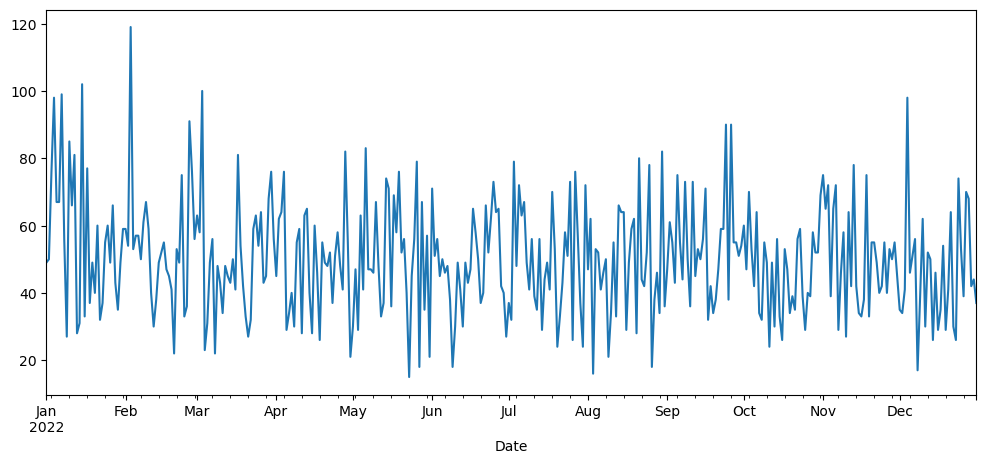

In [8]:
# plot harian jumlah qty
jumlah_qty_harian['Qty'].plot(figsize=(12,5))

### Check for Stationarity

Kemudian akan dilakukan pengecekan kestasioneran pada dataset menggunaka ADF.

In [9]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)

In [10]:
ad_test(jumlah_qty_harian['Qty'])

1. ADF :  -19.018782802299746
2. P-Value :  0.0
3. Num of Lags :  0
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  364
5. Critical Values : 
	 1% : -3.4484434475193777
	 5% : -2.869513170510808
	 10% : -2.571017574266393


- Nilai ADF adalah -19.018782802299746. Nilai ini digunakan untuk menguji hipotesis nol bahwa deret waktu adalah non-stasioner. Semakin negatif nilai ADF, semakin besar kecenderungan untuk menerima hipotesis alternatif bahwa deret waktu adalah stasioner.
- P-Value ini sama dengan nol. Karena P-Value sama dengan nol dan kurang dari alpha 5%, kita dapat menolak hipotesis nol dan menyimpulkan bahwa deret waktu adalah stasioner.
- Jumlah lag yang digunakan dalam pengujian ADF adalah 0
- Ada 364 observasi yang digunakan dalam perhitungan.
- Nilai-nilai kritis adalah nilai-nilai ambang yang digunakan untuk membandingkan nilai ADF. Jika nilai ADF lebih negatif dari nilai-nilai kritis ini, maka kita dapat menolak hipotesis nol. Dalam hal ini, kita memiliki tiga nilai kritis yang sesuai dengan tingkat signifikansi 1%, 5%, dan 10%. Semua nilai-nilai kritis ini lebih negatif dari nilai ADF, yang menunjukkan bahwa deret waktu adalah stasioner.

Berdasarkan hasil di atas, dapat disimpulkan bahwa deret waktu yang diuji adalah stasioner. Stasioneritas adalah salah satu asumsi penting dalam analisis deret waktu statistik, dan hasil ini menunjukkan bahwa kita dapat melanjutkan dengan analisis lebih lanjut menggunakan asumsi tersebut.

### Split Data into Training and Testing

Kemudian kita melakukan split data untuk membagi dataset menjadi data train dan test. Pada kasus ini, data train yang digunakan yaitu sebanyak 360 data dan data test sebanyak 5 data, karena diasumsikan akan dilakukan prediksi jumlah quantity harian pada jangka pendek sehingga data train yang digunakan untuk pelatihan menjadi lebih banyak.

In [11]:
# split dataset menjadi train dan test data
print(jumlah_qty_harian.shape)
train = jumlah_qty_harian.iloc[:-5]
test = jumlah_qty_harian.iloc[-5:]
print(train.shape, test.shape)

(365, 1)
(360, 1) (5, 1)


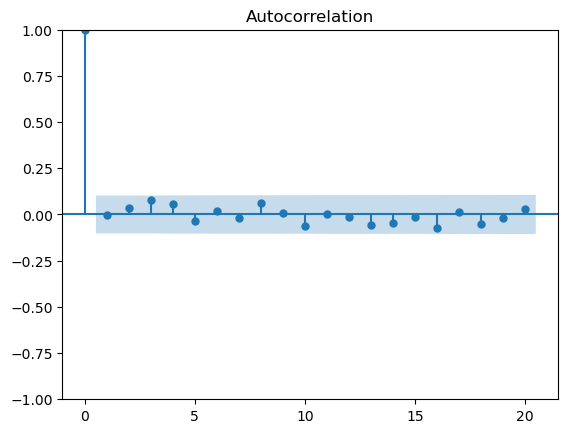

In [12]:
plot_acf(jumlah_qty_harian, lags=20)
plt.show()

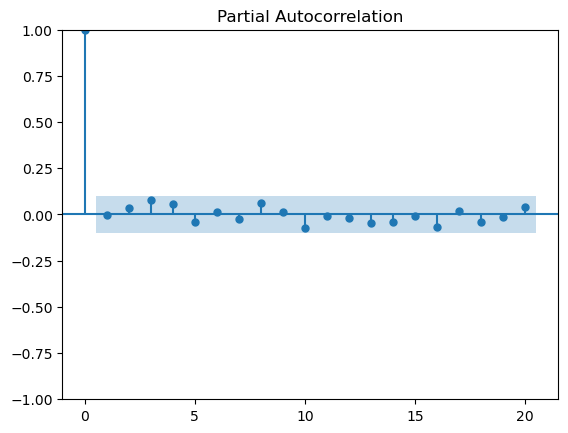

In [13]:
plot_pacf(jumlah_qty_harian, lags=20)
plt.show()

Terlihat dari plot acf maupun plot pacf lags yang melebihi dari garis kepercayaan hanya pada lag = 0.

### Figure Out Order for ARIMA Model

In [14]:
stepwise_fit = auto_arima(train['Qty'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3058.238, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3053.372, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3055.371, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3055.371, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3879.689, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3057.367, Time=0.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.633 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  360
Model:                        SARIMAX   Log Likelihood               -1524.686
Date:                Sun, 03 Sep 2023   AIC                           3053.372
Time:                        15:42:23   BIC                           3061.144
Sample:                    01-01-2022   HQIC                          3056.462
                         - 12-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     50.0972      0.946     52.953      0.000      48.243      51.951
sigma2       279.3878     19.366     14.427      0.000     241.431     317.344
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.94
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.60
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Model terbaik pada kasus ini adalah "ARIMA(0,0,0)(0,0,0)[0] intercept" dengan AIC sekitar 3053.372, ini berarti model tidak memiliki komponen AR, I, atau MA. AIC digunakan untuk membandingkan kualitas berbagai model statistik. Semakin rendah nilai AIC, semakin baik modelnya.

### Train the Model

In [15]:
model = ARIMA(train['Qty'], order=(0,0,0))
model = model.fit()

# Tampilkan ringkasan model
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  360
Model:                          ARIMA   Log Likelihood               -1524.686
Date:                Sun, 03 Sep 2023   AIC                           3053.372
Time:                        15:42:31   BIC                           3061.144
Sample:                    01-01-2022   HQIC                          3056.462
                         - 12-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0972      0.946     52.954      0.000      48.243      51.951
sigma2       279.3849     19.365     14.427      0.000     241.429     317.340
Ljung-Box (L1) (Q):                   0.00   Jarque-

### Make Predictions on Test Set

<AxesSubplot:xlabel='Date'>

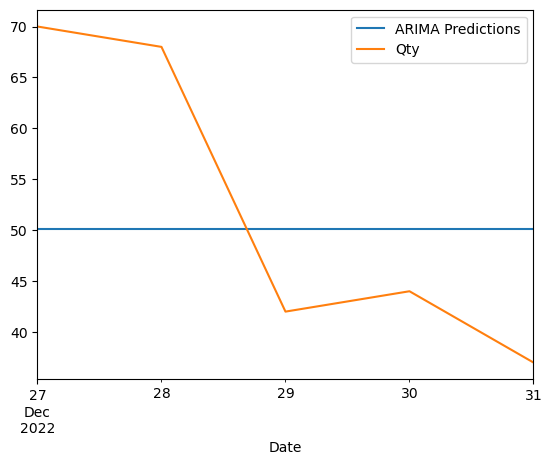

In [16]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Qty'].plot(legend=True)

Dari plot di atas terlihat bahwa model yang diperoleh yaitu ARIMA(0,0,0) belum bisa memprediksi jumlah quantity harian dengan baik, meskipun dari hasil pengujian diperoleh model ARIMA(0,0,0) merupakan model yang terbaik pada kasus ini.

In [17]:
test['Qty'].mean()

52.2

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Qty']))
print(rmse)

14.077702045840883


In [19]:
model2 = ARIMA(jumlah_qty_harian['Qty'], order=(0,0,0))
model2 = model2.fit()
jumlah_qty_harian.tail()

,Qty
Date,
2022-12-27,70
2022-12-28,68
2022-12-29,42
2022-12-30,44
2022-12-31,37


### For Future Dates

Pada tahap ini dilakukan prediksi untuk 5 hari kedepan yaitu dari tanggal 31 Desember 2022 hingga 4 Januari 2023.

In [20]:
index_future_dates = pd.date_range(start='2022-12-31', end='2023-01-04')
pred = model2.predict(start=len(jumlah_qty_harian), end=len(jumlah_qty_harian)+4, type='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

2022-12-31    50.126023
2023-01-01    50.126023
2023-01-02    50.126023
2023-01-03    50.126023
2023-01-04    50.126023
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

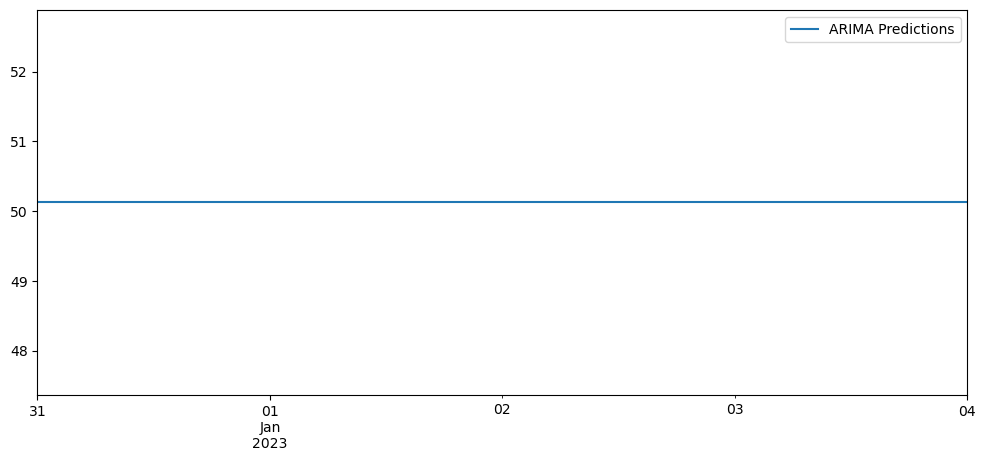

In [21]:
pred.plot(figsize=(12,5), legend=True)

Dari plot prediksi 5 hari selanjutnya, terlihat bahwa model memprediksi nilai yang sama pada 5 hari tersebut. Hal ini menunjukkan bahwa model yang digunakan pada projek ini yaitu model ARIMA(0,0,0) belum baik dalam memprediksi jumlah quantity harian.

### Saran:
Model Arima(0,0,0) belum bisa memprediksi dataset dengan baik, sehingga untuk penelitian selanjutnya dapat dicoba model time series lainnya untuk memprediksi jumlah quantity harian.

# Machine Learning Clustering

Pada tahap ini akan dilakukan klastering.

In [22]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1311,TR99839,123,2022-01-01,P2,3200,6,19200,1,34,0,Married,4.36,Ginger Candy,3200,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
434,TR67455,49,2022-01-01,P5,4200,3,12600,13,44,1,Married,13.48,Thai Tea,4200,Buana,Buana,General Trade,-1.269160,116.825264
1275,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
4870,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,10000,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [23]:
aggregated_data = df.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Menghitung jumlah transaksi
    'Qty': 'sum',              # Menghitung jumlah qty
    'TotalAmount': 'sum'       # Menghitung jumlah total amount
}).reset_index()
aggregated_data

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


### Menentukan jumlah klaster dengan elbow method

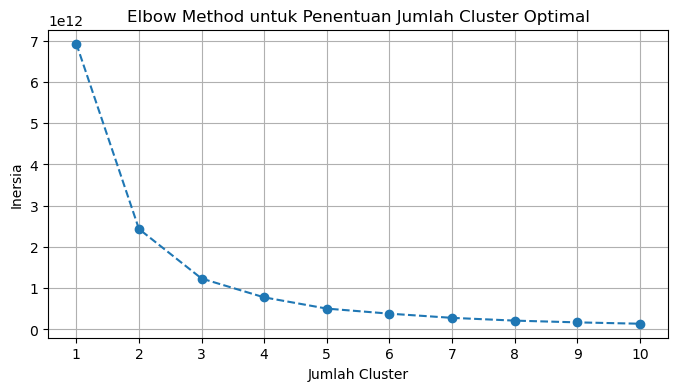

In [24]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_data)
    inertia.append(kmeans.inertia_)

# Plot inersia terhadap jumlah cluster
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Penentuan Jumlah Cluster Optimal')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Dari plot elbow method di atas terlihat bahwa dari klaster 1 hingga terjadi penurunan yang signifikan, kemudian dari klaster 3 menuju klaster 10 penurunan terjadi sedikit demi sedikit, sehingga dari hasil tersebut jumlah klaster yang akan digunakan pada projek ini yaitu 3 klaster.

### KMeans Clustering

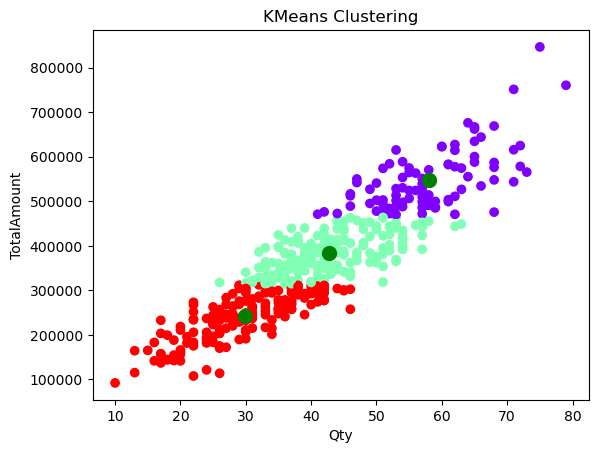

     CustomerID  TransactionID  Qty  TotalAmount  Cluster
0             1             17   60       623300        0
1             2             13   57       392300        1
2             3             15   56       446200        1
3             4             10   46       302500        2
4             5              7   27       268600        2
..          ...            ...  ...          ...      ...
442         443             16   59       485100        0
443         444             18   62       577700        0
444         445             18   68       587200        0
445         446             11   42       423300        1
446         447             13   42       439300        1

[447 rows x 5 columns]


In [25]:
# Pilih jumlah cluster (K)
k = 3

# Buat model KMeans
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)

# Latih model
kmeans.fit(aggregated_data)

# Dapatkan label cluster untuk setiap entitas
labels = kmeans.labels_

# Tambahkan label cluster ke dalam DataFrame
aggregated_data['Cluster'] = labels

# Visualisasi hasil clustering
plt.scatter(aggregated_data['Qty'], aggregated_data['TotalAmount'], c=aggregated_data['Cluster'], cmap='rainbow')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s=100, c='green', label='Centroids')

plt.xlabel('Qty')
plt.ylabel('TotalAmount')
plt.title('KMeans Clustering')
plt.show()

# Menampilkan hasil clustering
print(aggregated_data)

Data dibagi menjadi tiga kelompok berdasarkan kemiripan antara kolom Qty dan TotalAmount.

**Klaster 1:** Kelompok pertama terdiri dari transaksi dengan jumlah barang (quantity) rendah dan total jumlah pembayaran (total amount) rendah. Ini dapat menggambarkan transaksi-transaksi kecil atau pembelian dengan jumlah yang kecil.

**Klaster 2:** Kelompok kedua terdiri dari transaksi dengan jumlah barang (quantity) sedang dan total jumlah pembayaran (total amount) sedang. Ini bisa mencerminkan transaksi-transaksi menengah yang tidak terlalu besar atau kecil.

**Klaster 3:** Kelompok ketiga berisi transaksi dengan jumlah barang (quantity) tinggi dan total jumlah pembayaran (total amount) tinggi. Ini dapat mencerminkan transaksi besar atau pembelian dalam jumlah besar.

Dengan demikian, klasterisasi ini membantu memahami bagaimana transaksi dibagi berdasarkan volume barang dan total jumlah pembayaran. Ini dapat memberikan wawasan berharga dalam menganalisis pola pembelian atau transaksi pelanggan, dan dapat digunakan untuk mengidentifikasi segmen pelanggan atau tren pembelian tertentu. Klasterisasi juga dapat digunakan untuk pengelompokan data dalam rangka analisis lanjutan atau pengambilan keputusan bisnis.